# Classification Prototyping

In [3]:
import tensorflow as tf
import keras
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import sklearn
import pandas as pd
from sklearn.model_selection import train_test_split
import pickle
import skimage

%matplotlib inline

Using TensorFlow backend.


## Using Histogram equilisation

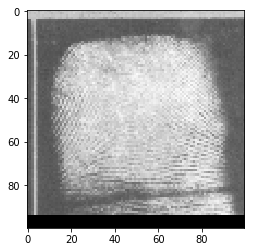

In [9]:

import numpy as np

from skimage import data, img_as_float
from skimage import exposure
types = ['A', 'L', 'R', 'T', 'W']
X_raw = []
y_raw = []
for i, t in enumerate(types):
    pics = os.listdir('trainingSet/{0}'.format(t))
    for name in pics:
        #print('trainingSet/{0}/{1}'.format(t, name))
        img = cv2.imread('trainingSet/{0}/{1}'.format(t, name),0)
        if img is not None:
            img = cv2.resize(img, (100, 100))
#            img = exposure.equalize_adapthist(img, clip_limit=0.7)
            img = img / 255.0
            X_raw.append(img)
            y_raw.append(i)
            #print(i)
    
plt.imshow(X_raw[0], cmap="Greys")

y_onehot = np.array(pd.get_dummies(y_raw))
X_train, X_test, y_train, y_test = train_test_split(X_raw, y_onehot, test_size=0.2, random_state=0)

X_train = np.array(X_train)
X_test = np.array(X_test)
X_train = np.resize(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))   
X_test = np.resize(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2], 1))   
pickle.dump({
    'X_train' : X_train,
    'X_test' : X_test,
    'y_train' : np.array(y_train),
    'y_test' : np.array(y_test)   
}, open( "dataEqHist.pickle", "wb" ) )

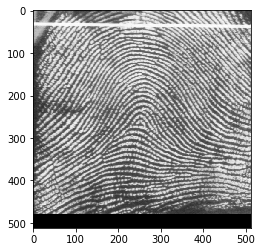

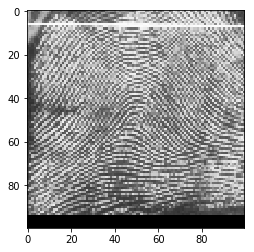

NameError: name 'X_raw' is not defined

In [4]:
img = cv2.imread('./trainingSet/A/f0005_03.png', 0)
plt.imshow(img, cmap="Greys")
plt.show()
#print(img)
img2 = cv2.resize(img, (100, 100))
plt.imshow(img2, cmap="Greys")
plt.show()
plt.imshow(X_raw[5], cmap="Greys")

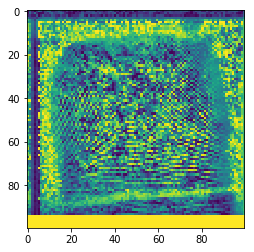

In [13]:
types = ['A', 'L', 'R', 'T', 'W']
X_raw = []
y_raw = []
for i, t in enumerate(types):
    pics = os.listdir('trainingSet/{0}'.format(t))
    for name in pics:
        #print('trainingSet/{0}/{1}'.format(t, name))
        img = cv2.imread('trainingSet/{0}/{1}'.format(t, name),0)
        if img is not None:
            img = cv2.resize(img, (100, 100))
            img = exposure.equalize_adapthist(img, clip_limit=0.7)
            img = img / 255.0
            X_raw.append(img)
            y_raw.append(i)
            #print(i)
    
plt.imshow(X_raw[5], cmap="Greys")

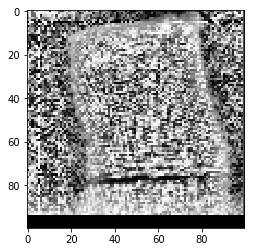

In [16]:
plt.imshow(X_raw[80], cmap="Greys")

In [ ]:
test = pickle.load(open('./data500.pickle', 'rb'))
X_train = test['X_train']
X_test = test['X_test']
y_train = test['y_train']
y_test = test['y_test']

In [6]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(500, 500, 1)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(5, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='rmsprop')

NameError: name 'Sequential' is not defined

In [ ]:
model.fit(X_train, y_train, batch_size=32, epochs=1, metrics=['accuracy'])

In [7]:
model.evaluate(X_test, y_test, batch_size=32)

NameError: name 'model' is not defined

In [8]:
import tensorflow as tf
import keras
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import sklearn
import pandas as pd
from sklearn.model_selection import train_test_split
import pickle
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

train = pickle.load(open('./data.pickle', 'rb'))
X_train = train['X_train']
X_test = train['X_test']
y_train = train['y_train']
y_test = train['y_test']

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 1)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(5, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.fit(X_train, y_train, batch_size=32, epochs=1, validation_data=(X_test, y_test), shuffle=True)




MemoryError: 

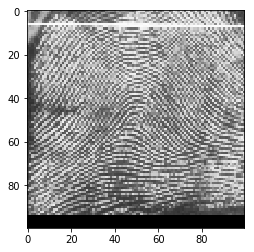

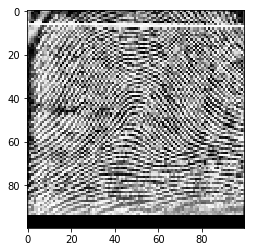

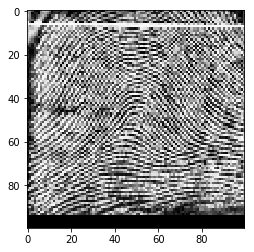

In [7]:
"""
======================
Histogram Equalization
======================

This examples enhances an image with low contrast, using a method called
*histogram equalization*, which "spreads out the most frequent intensity
values" in an image [1]_. The equalized image has a roughly linear cumulative
distribution function.

While histogram equalization has the advantage that it requires no parameters,
it sometimes yields unnatural looking images.  An alternative method is
*contrast stretching*, where the image is rescaled to include all intensities
that fall within the 2nd and 98th percentiles [2]_.

.. [1] http://en.wikipedia.org/wiki/Histogram_equalization
.. [2] http://homepages.inf.ed.ac.uk/rbf/HIPR2/stretch.htm

"""

import matplotlib
import matplotlib.pyplot as plt

from skimage import exposure

# Load an example image
im = img2
plt.imshow(im, cmap="Greys")

plt.show()

# Adaptive Equalization
img_adapteq = exposure.equalize_adapthist(im, clip_limit=0.7)
plt.imshow(img_adapteq, cmap="Greys")
plt.show()

img_adapteq = exposure.equalize_adapthist(im, clip_limit=0.03)
plt.imshow(img_adapteq, cmap="Greys")
plt.show()

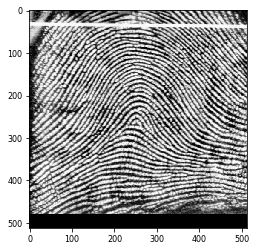

In [39]:
img_adapteq = exposure.equalize_adapthist(img, clip_limit=0.03)

plt.imshow(img_adapteq, cmap="Greys")

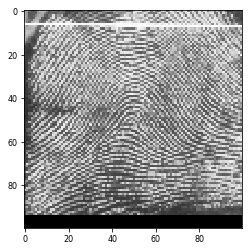

In [41]:
plt.imshow(img, cmap="Greys")

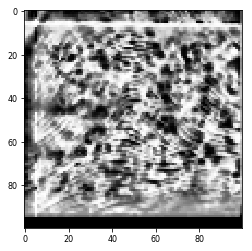

In [33]:
# opencv
import cv2

def build_filters():
    """ returns a list of kernels in several orientations
    """
    filters = []
    ksize = 3
    for theta in np.arange(0, np.pi, np.pi / 32):
        params = {'ksize':(ksize, ksize), 'sigma':1.0, 'theta':theta, 'lambd':15.0,
                  'gamma':0.9, 'psi':1, 'ktype':cv2.CV_32F}
        kern = cv2.getGaborKernel(**params)
        kern /= 1.5*kern.sum()
        filters.append((kern,params))
    return filters

def process(img, filters):
    """ returns the img filtered by the filter list
    """
    accum = np.zeros_like(img)
    for kern,params in filters:
        fimg = cv2.filter2D(img, cv2.CV_8UC3, kern)
        np.maximum(accum, fimg, accum)
    return accum


#main
filters = build_filters()
p = process(img2, filters)
img_adapteq = exposure.equalize_adapthist(p, clip_limit=0.7)
plt.imshow(img_adapteq, cmap="Greys")


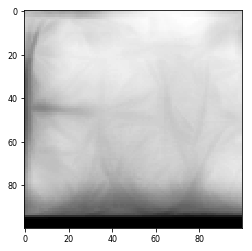

In [20]:
plt.imshow(p, cmap="Greys")

# From Github Biometrics 

In [12]:
# Metody biometryczne
# Przemyslaw Pastuszka

from PIL import Image, ImageDraw
import utils
import argparse
import math
import os
from utils import flatten, transpose

usage = False

def apply_structure(pixels, structure, result):
    global usage
    usage = False

    def choose(old, new):
        global usage
        if new == result:
            usage = True
            return 0.0
        return old

    utils.apply_kernel_with_f(pixels, structure, choose)

    return usage

def apply_all_structures(pixels, structures):
    usage = False
    for structure in structures:
        usage |= apply_structure(pixels, structure, utils.flatten(structure).count(1))

    return usage

def make_thin(im):
    loaded = utils.load_image(im)
    utils.apply_to_each_pixel(loaded, lambda x: 0.0 if x > 10 else 1.0)
    print ("loading phase done")

    t1 = [[1, 1, 1], [0, 1, 0], [0.1, 0.1, 0.1]]
    t2 = utils.transpose(t1)
    t3 = reverse(t1)
    t4 = utils.transpose(t3)
    t5 = [[0, 1, 0], [0.1, 1, 1], [0.1, 0.1, 0]]
    t7 = utils.transpose(t5)
    t6 = reverse(t7)
    t8 = reverse(t5)

    thinners = [t1, t2, t3, t4, t5, t6, t7]

    usage = True
    while(usage):
        usage = apply_all_structures(loaded, thinners)
        print("single thining phase done")

    print("thining done")

    utils.apply_to_each_pixel(loaded, lambda x: 255.0 * (1 - x))
    utils.load_pixels(im, loaded)
    im.show()

def reverse(ls):
    cpy = ls[:]
    cpy.reverse()
    return cpy


im = Image.open(img)
im = im.convert("L")  # covert to grayscale
im.show()

make_thin(im)


ImportError: cannot import name 'flatten'